# Problem Overview

Governments, NGOs, and analysts often want to understand global development patterns. Instead of using a single metric like GDP, we can cluster countries based on multiple indicators (economy, health, education, etc.) to uncover groups of countries with similar development levels. This can guide policy, investment, or aid decisions.

## Goal
Group countries into clusters such as “developed,” “developing,” and “emerging,” using multiple indicators.

## Link to dataset

https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data/data

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Exploring the data

In [2]:
df = pd.read_csv("Country-data.csv")
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
df.isna().sum()

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


## Data cleaning

In [ ]:
# drop categorical column: country

#df = df.drop(["country"], axis = 1)
#df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


## Unsupervised Learning

In [6]:
# select indicators

X = df[["child_mort", "health", "income", "inflation", "life_expec", "total_fer", "gdpp"]]
X

,child_mort,health,income,inflation,life_expec,total_fer,gdpp
0,90.2,7.58,1610,9.44,56.2,5.82,553
1,16.6,6.55,9930,4.49,76.3,1.65,4090
2,27.3,4.17,12900,16.10,76.5,2.89,4460
3,119.0,2.85,5900,22.40,60.1,6.16,3530
4,10.3,6.03,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...
162,29.2,5.25,2950,2.62,63.0,3.50,2970
163,17.1,4.91,16500,45.90,75.4,2.47,13500
164,23.3,6.84,4490,12.10,73.1,1.95,1310
165,56.3,5.18,4480,23.60,67.5,4.67,1310


In [7]:
# scale the data to ensure fair contribution, meaningful clusters, and policy relevant groupings

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [8]:
X_scaled

array([[ 1.29153238,  0.27908825, -0.8082454 , ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.09701618, -0.3753689 , ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.96607302, -0.22084447, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  0.0088773 , -0.65840354, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.59727159, -0.65892382, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.33801514, -0.72135793, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [9]:
# get optimum number of clusters using the elbow plot

wcss = []                                               # empty python list to store wcss value for differnet values of k
for k in range(2,8):                                    # loop over values of k from 2 to 7
  kmeans = KMeans(n_clusters = k, random_state = 42)    # gets number of clusters, and ensures consistent results (with seed 42)
  kmeans.fit(X_scaled)                                  # fit KMeans model to scaled data
  wcss.append(kmeans.inertia_)                          # append wcss value for the current k to the list

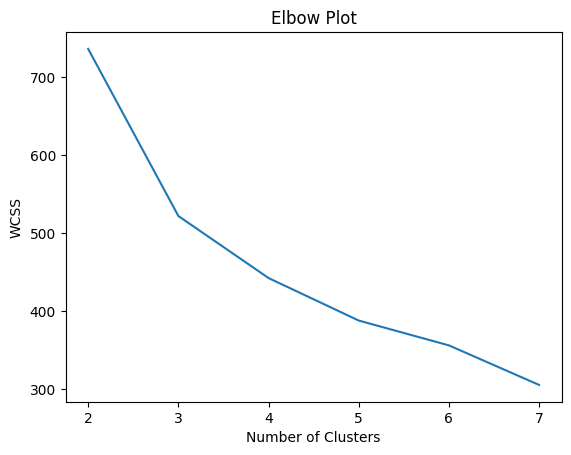

In [10]:
# plot the clusters

plt.plot(range(2,8), wcss)
plt.title("Elbow Plot")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

## KMeans Clustering Model

In [11]:
Kmeans_Algo = KMeans(n_clusters = 3, random_state = 42)     # creates a Kmeans clustering model
y_pred = Kmeans_Algo.fit_predict(X_scaled)                  # fits the clustering model to the scaled data

In [12]:
# attach clusters to the dataset

df["clusters"] = y_pred
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [13]:
df["clusters"].unique()

array([0, 2, 1], dtype=int32)

In [15]:
# analysing the clusters

cluster_summary = df.groupby("clusters").mean(numeric_only = True)
cluster_summary

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
clusters,,,,,,,,,
0,91.610417,29.571042,6.433542,43.133333,3897.354167,11.911146,59.239583,4.992083,1909.208333
1,4.903125,57.918750,9.015937,50.496875,47475.000000,2.703438,80.484375,1.774062,45331.250000
2,21.113793,41.291828,6.217241,47.636390,13297.586207,7.371506,73.147126,2.251954,7158.298851


In [16]:
# label the clusters to developed, developing, emerging

cluster_label = {
    0: "Developing",
    1: "Developed",
    2: "Emerging"
}

In [17]:
# assign the cluster label to each country by mapping the cluster label to the cluster column in the dataset

df["dev_level"] = df["clusters"].map(cluster_label)

In [18]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,dev_level
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,Developing
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,Emerging
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,Emerging
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,Developing
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,Emerging
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2,Emerging
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2,Emerging
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2,Emerging
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0,Developing
